#BTC-USD

##7:2:1

In [50]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [51]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('/content/BTC-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [52]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [53]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [54]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[39824.41050678 39842.72555014 39861.0405935  39879.35563686
 39897.67068022 39915.98572358 39934.30076694 39952.6158103
 39970.93085367 39989.24589703 40007.56094039 40025.87598375
 40044.19102711 40062.50607047 40080.82111383 40099.13615719
 40117.45120056 40135.76624392 40154.08128728 40172.39633064
 40190.711374   40209.02641736 40227.34146072 40245.65650408
 40263.97154745 40282.28659081 40300.60163417 40318.91667753
 40337.23172089 40355.54676425]


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)

# In kết quả
print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)



Testing MAE: 14425.135187947444
Testing RMSE: 16471.469440376804
Testing MAPE: 40.00042582832275
Validation MAE: 14876.289451493547
Validation RMSE: 15293.876524689715
Validation MAPE: 71.4726675056776


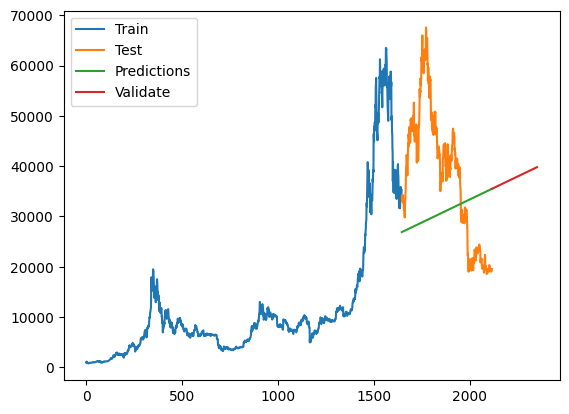

In [56]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()

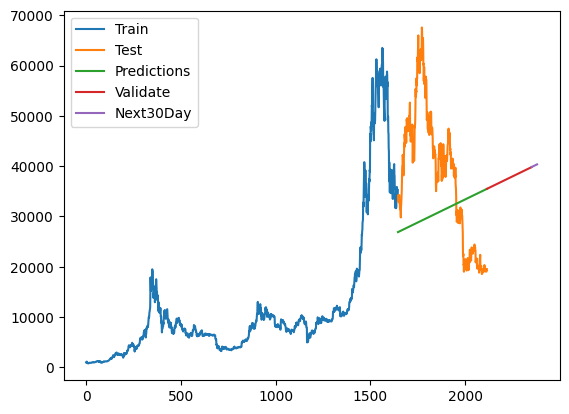

In [57]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [58]:
test_data.index

RangeIndex(start=1646, stop=2116, step=1)

##5:3:2

In [59]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [60]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/BTC-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [61]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [62]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [63]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[15077.19434497 15082.06985934 15086.94537371 15091.82088807
 15096.69640244 15101.57191681 15106.44743117 15111.32294554
 15116.19845991 15121.07397427 15125.94948864 15130.82500301
 15135.70051737 15140.57603174 15145.45154611 15150.32706047
 15155.20257484 15160.07808921 15164.95360357 15169.82911794
 15174.70463231 15179.58014667 15184.45566104 15189.33117541
 15194.20668977 15199.08220414 15203.95771851 15208.83323287
 15213.70874724 15218.58426161]


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)

# In kết quả
print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)



Testing MAE: 21873.520444167716
Testing RMSE: 28005.594808080394
Testing MAPE: 51.66940968272469
Validation MAE: 11718.980675651921
Validation RMSE: 14263.592858145392
Validation MAPE: 41.01192056370995


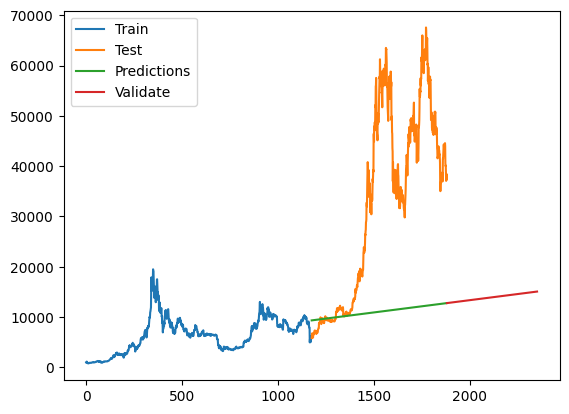

In [65]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()

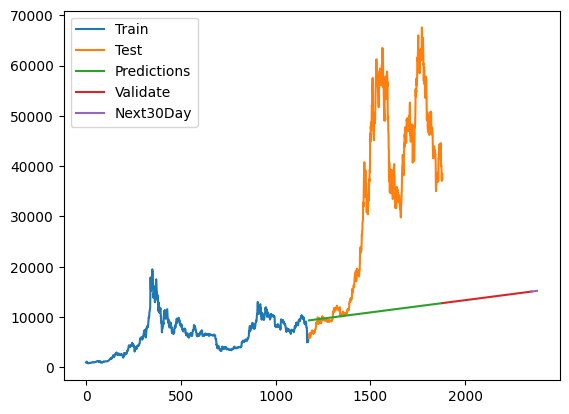

In [66]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [67]:
test_data.index

RangeIndex(start=1176, stop=1881, step=1)

#DOGE-USD

##7:2:1

In [68]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [69]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/DOGE-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [70]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [71]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [72]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[0.22218015 0.22231629 0.22245244 0.22258858 0.22272472 0.22286086
 0.22299701 0.22313315 0.22326929 0.22340544 0.22354158 0.22367772
 0.22381386 0.22395001 0.22408615 0.22422229 0.22435843 0.22449458
 0.22463072 0.22476686 0.224903   0.22503915 0.22517529 0.22531143
 0.22544758 0.22558372 0.22571986 0.225856   0.22599215 0.22612829]


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)

# In kết quả
print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)



Testing MAE: 0.07517885833390275
Testing RMSE: 0.08702552527583426
Testing MAPE: 88.01380647654945
Validation MAE: 0.1275524131453537
Validation RMSE: 0.1283699800617163
Validation MAPE: 161.58062623788584


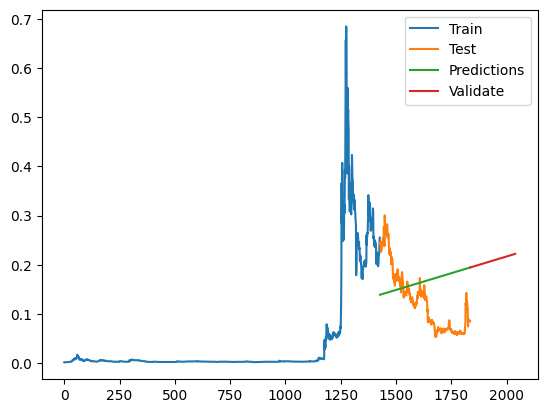

In [74]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()

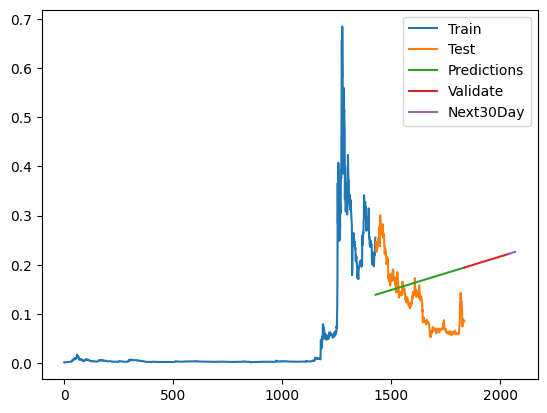

In [75]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [76]:
test_data.index

RangeIndex(start=1428, stop=1836, step=1)

##5:3:2

In [77]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [78]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/DOGE-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [79]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [80]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [81]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[-0.00097635 -0.00097913 -0.0009819  -0.00098467 -0.00098744 -0.00099021
 -0.00099298 -0.00099575 -0.00099852 -0.00100129 -0.00100407 -0.00100684
 -0.00100961 -0.00101238 -0.00101515 -0.00101792 -0.00102069 -0.00102346
 -0.00102624 -0.00102901 -0.00103178 -0.00103455 -0.00103732 -0.00104009
 -0.00104286 -0.00104563 -0.00104841 -0.00105118 -0.00105395 -0.00105672]


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)

# In kết quả
print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)



Testing MAE: 0.14901856723990067
Testing RMSE: 0.19545992105015628
Testing MAPE: 86.89143718501244
Validation MAE: 0.07839375396025006
Validation RMSE: 0.07992054102673278
Validation MAPE: 100.53342150967619


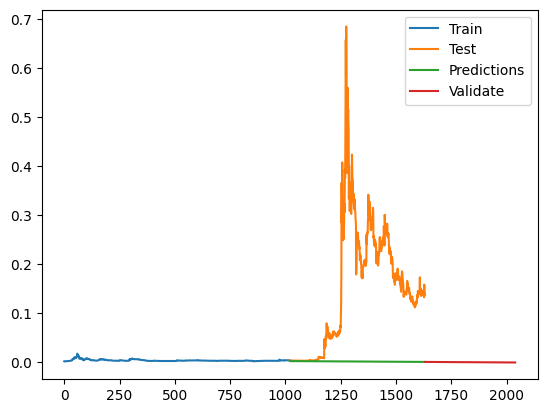

In [83]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()

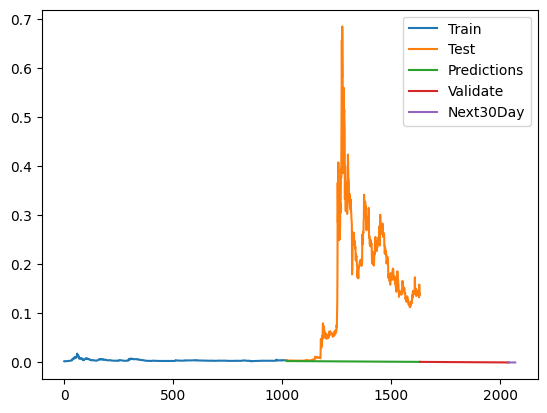

In [84]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [85]:
test_data.index

RangeIndex(start=1020, stop=1632, step=1)

#ETH-USD

##7:2:1

In [86]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [87]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/ETH-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [88]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [89]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [90]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2386.01863231 2387.26754535 2388.5164584  2389.76537144 2391.01428449
 2392.26319753 2393.51211058 2394.76102363 2396.00993667 2397.25884972
 2398.50776276 2399.75667581 2401.00558886 2402.2545019  2403.50341495
 2404.75232799 2406.00124104 2407.25015408 2408.49906713 2409.74798018
 2410.99689322 2412.24580627 2413.49471931 2414.74363236 2415.9925454
 2417.24145845 2418.4903715  2419.73928454 2420.98819759 2422.23711063]


In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)

# In kết quả
print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)



Testing MAE: 1130.154421280433
Testing RMSE: 1386.0545698551305
Testing MAPE: 43.048856776841895
Validation MAE: 646.3997199765823
Validation RMSE: 676.0175578586488
Validation MAPE: 43.49694517742717


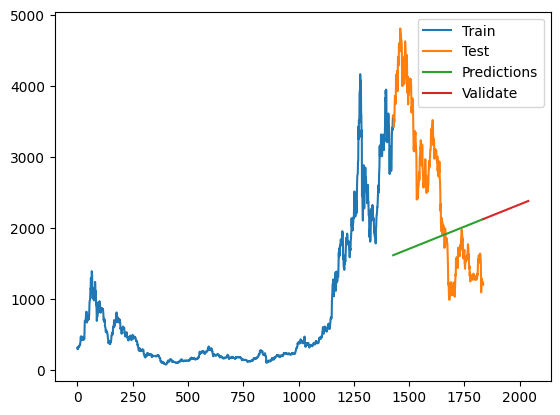

In [92]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()

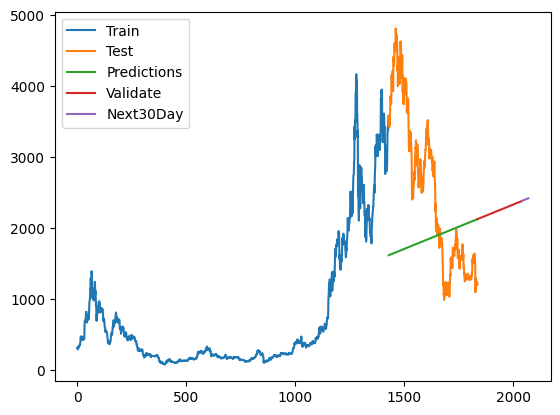

In [93]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [94]:
test_data.index

RangeIndex(start=1428, stop=1836, step=1)

##5:3:2

In [95]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [96]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/ETH-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [97]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [98]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [99]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[-452.29589101 -452.79907247 -453.30225394 -453.80543541 -454.30861687
 -454.81179834 -455.31497981 -455.81816127 -456.32134274 -456.82452421
 -457.32770567 -457.83088714 -458.33406861 -458.83725008 -459.34043154
 -459.84361301 -460.34679448 -460.84997594 -461.35315741 -461.85633888
 -462.35952034 -462.86270181 -463.36588328 -463.86906474 -464.37224621
 -464.87542768 -465.37860914 -465.88179061 -466.38497208 -466.88815354]


In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)

# In kết quả
print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)



Testing MAE: 2421.2709830526437
Testing RMSE: 2764.033354521997
Testing MAPE: 101.78271395213278
Validation MAE: 1942.551545840648
Validation RMSE: 1972.2566415738672
Validation MAPE: 122.69685200537485


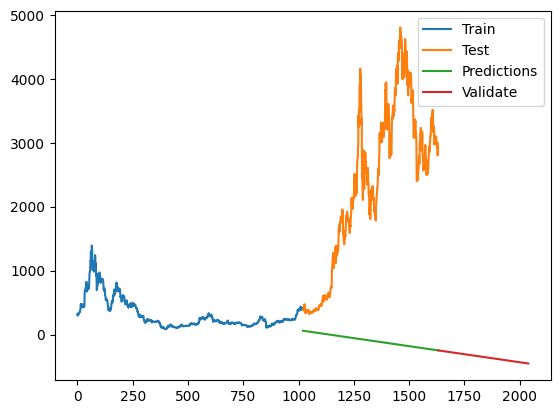

In [101]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()

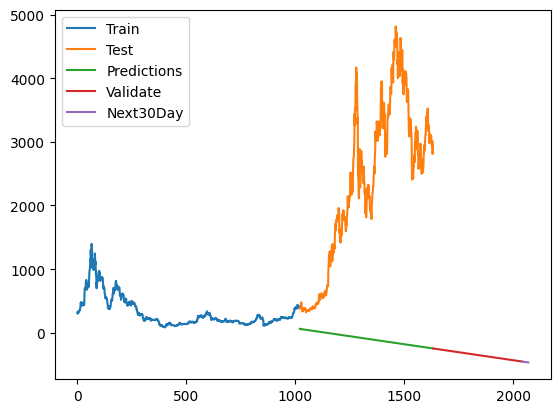

In [102]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [103]:
test_data.index

RangeIndex(start=1020, stop=1632, step=1)